In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [74]:
!git clone https://github.com/yoshi47/deep-learning-from-scratch.git

Cloning into 'deep-learning-from-scratch'...
remote: Enumerating objects: 457, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 457 (delta 0), reused 1 (delta 0), pack-reused 453
Receiving objects: 100% (457/457), 5.52 MiB | 30.88 MiB/s, done.
Resolving deltas: 100% (235/235), done.


# ２章 パーセプトロン

ANDゲート：２つの入力が１のときだけ１を出力し、それ以外は０を出力

NANDゲート：Not AND ２つの入力が１のときだけ０を出力し、それ以外は１を出力

ORゲート：入力信号の少なくともひとつが１であれば、出力が１になる

## パーセプトロンの実装

簡単な実装

In [2]:
def AND(x1, x2):
    w1, w2, theta = 0.5, 0.5, 0.7
    tmp = x1*w1 + x2*w2
    if tmp <= theta:
        return 0
    elif tmp > theta:
        return 1

In [3]:
AND(0, 0), AND(1, 0), AND(0, 1), AND(1, 1)

(0, 0, 0, 1)

重みとバイアスの導入

バイアスは発火のしやすさーー出力信号が１を出力する度合いーー

In [4]:
import numpy as np

In [5]:
# 入力
x = np.array([0, 1])
# 重み
w = np.array([0.5, 0.5])
# バイアス
b = -0.7

In [6]:
w*x

array([0. , 0.5])

In [7]:
np.sum(w*x) + b

-0.19999999999999996

重みとバイアスによる実装

重みとバイアスだけが変わる

ANDゲート：２つの入力が１のときだけ１を出力し、それ以外は０を出力

In [8]:
def AND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.7
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

In [9]:
(AND(0, 0), AND(1, 0), AND(0, 1), AND(1, 1))

(0, 0, 0, 1)

NANDゲート：Not AND ２つの入力が１のときだけ０を出力し、それ以外は１を出力

In [10]:
def NAND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([-0.5, -0.5])
    b = 0.7
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

In [11]:
(NAND(0, 0), NAND(1, 0), NAND(0, 1), NAND(1, 1))

(1, 1, 1, 0)

ORゲート：入力信号の少なくともひとつが１であれば、出力が１になる

In [12]:
def OR(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.2
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

In [13]:
(OR(0, 0), OR(1, 0), OR(0, 1), OR(1, 1))

(0, 1, 1, 1)

## パーセプトロンの限界

XORゲート：２つの入力のどちらかが１のときだけ出力が１になる

排他的論理和

## 多層パーセプトロン

NANDゲート\
           ＞ANDゲート
ORゲート　/

In [14]:
def XOR(x1, x2):
    s1 = NAND(x1, x2)
    s2 = OR(x1, x2)
    y = AND(s1, s2)
    return y

In [15]:
(XOR(0, 0), XOR(1, 0), XOR(0, 1), XOR(1, 1))

(0, 1, 1, 0)

ANDやORが単相のパーセプトロンであったのに対して、XORは２層のパーセプトロン

層を複数重ねたパーセプトロンを多層パーセプトロンと言うことがある

## まとめ

パーセプトロンはニューラルネットワークの基礎

# ニューラルネットワーク

適切な重みパラメータをデータから自動で学習できる

## パーセプトロンからニューラルネットワークへ

**活性化関数**：入力信号の総和を出力信号に変換する関数

## 活性化関数

### ステップ関数の実装

入力が０を超えたら１を出力し、それ以外は０を出力する

In [16]:
def step_function(x):
    if x > 0:
        return 1

    else:
        return 0

NumPy配列に対応する

In [17]:
def step_function(x):
    y = x > 0
    return y.astype(np.int)

yはboolの配列、値になる

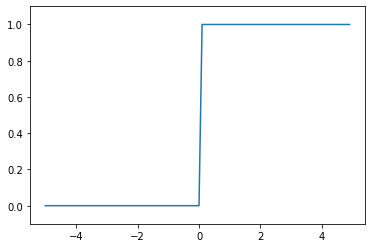

In [18]:
import numpy as np
import matplotlib.pylab as plt

def step_function(x):
    return np.array(x > 0, dtype=np.int64)

x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

### シグモイド関数の実装

In [19]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

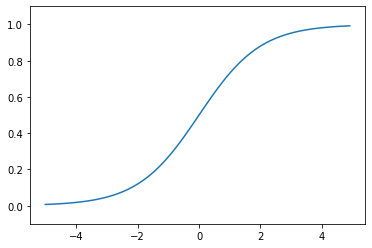

In [20]:
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

パーセプトロンは０か１のどちらかしか返さない

ニューラルネットワークは連続的な実数値の信号が流れる

どちらも非線形関数（真っ直ぐでない）

### ReLU関数

入力が０を超えていれば、その入力をそのまま出力し、０以下ならば０を出力する関数

In [21]:
def relu(x):
    return np.maximun(0, x)

## 多次元配列の計算

In [22]:
X = np.array([1, 2])
W = np.array([[1, 3, 5], [2, 4, 6]])

Y = np.dot(X, W)
print(Y)

[ 5 11 17]


## ３層ニューラルネットワークの実装

In [23]:
X = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])

print(W1.shape)
print(X.shape)
print(B1.shape)

A1 = np.dot(X, W1) + B1

(2, 3)
(2,)
(3,)


In [24]:
Z1 = sigmoid(A1)
print(A1)
print(Z1)

[0.3 0.7 1.1]
[0.57444252 0.66818777 0.75026011]


In [25]:
W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
B2 = np.array([0.1, 0.2])

print(Z1.shape)
print(W2.shape)
print(B2.shape)

A2 = np.dot(Z1, W2) + B2
Z2 = sigmoid(A2)

(3,)
(3, 2)
(2,)


In [26]:
def identity_function(x):
    return x

In [27]:
W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
B3 = np.array([0.1, 0.2])

A3 = np.dot(Z2, W3) + B3
Y = identity_function(A3)

実装のまとめ

In [28]:
def init_network():
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])
    
    return network


def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = identity_function(a3)
    
    return y

network = init_network()

x = np.array([1.0, 0.5])
y = forward(network, x)
print(y)

[0.31682708 0.69627909]


In [29]:
a = np.array([0.3, 2.9, 4.0])

exp_a = np.exp(a)
print(exp_a)

[ 1.34985881 18.17414537 54.59815003]


### ソフトマックス関数

In [30]:
sum_exp_a = np.sum(exp_a)
print(sum_exp_a)

74.1221542101633


In [31]:
y = exp_a / sum_exp_a
print(y)

[0.01821127 0.24519181 0.73659691]


In [32]:
def softmax(a):
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    
    return y

ソフトマックス関数 オーバーフローに気をつける

In [33]:
a = np.array([1010, 1000, 990])
np.exp(a) / np.sum(np.exp(a))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


array([nan, nan, nan])

オーバーフロー対策

In [34]:
c = np.max(a)
print(a - c)

[  0 -10 -20]


In [35]:
np.exp(a - c) / np.sum(np.exp(a - c))

array([9.99954600e-01, 4.53978686e-05, 2.06106005e-09])

In [36]:
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    
    return y

In [37]:
a = np.array([0.3, 2.9, 4.0])
y = softmax(a)
print(y)
np.sum(y)

[0.01821127 0.24519181 0.73659691]


1.0

ソフトマックス関数の出力の総和は１になる

## 手書き数字認識

MNISTデータセット：手書き数字の画像セット

In [38]:
import sys, os

sys.path.append('/content/drive/MyDrive/Colab Notebooks/Book/deep-learning-from-scratch')

In [75]:
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)

Done
Done
Done
Done
Converting train-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting train-labels-idx1-ubyte.gz to NumPy Array ...
Done
Converting t10k-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting t10k-labels-idx1-ubyte.gz to NumPy Array ...
Done
Creating pickle file ...
Done!


In [40]:
print(x_train.shape)
print(t_train.shape)
print(x_test.shape)
print(t_test.shape)


(60000, 784)
(60000,)
(10000, 784)
(10000,)


load_mnist関数は、「（訓練画像、訓練ラベル）、（テスト画像、テストラベル）」でデータを返す

In [76]:
import numpy as np
from PIL import Image
from IPython.display import display


def img_show(img):
  pil_img = Image.fromarray(np.uint8(img))
  pil_img.show()
  display(pil_img)

img = x_train[0]
label = t_train[0]
print(label)

print(img.shape)
img = img.reshape(28, 28)
print(img.shape)
img_show(img)


5
(784,)
(28, 28)


In [77]:
import pickle

def get_data():
  (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True, one_hot_label=False)
  return x_test, t_test

def init_network():
  with open('/content/drive/MyDrive/Colab Notebooks/Book/deep-learning-from-scratch/ch03/sample_weight.pkl', 'rb') as f:
    network = pickle.load(f)

  return network

def predict(network, x):
  W1, W2, W3 = network['W1'], network['W2'], network['W3']
  b1, b2, b3 = network['b1'], network['b2'], network['b3']
  
  a1 = np.dot(x, W1) + b1
  z1 = sigmoid(a1)
  a2 = np.dot(z1, W2) + b2
  z2 = sigmoid(a2)
  a3 = np.dot(z2, W3) + b3
  y = softmax(a3)

  return y

In [78]:
x, t = get_data()
network = init_network()

accuracy_cnt = 0
for i in range(len(x)):
  y = predict(network, x[i])
  p = np.argmax(y)
  if p == t[i]:
    accuracy_cnt += 1

print('Accuracy:' + str(float(accuracy_cnt) / len(x)))

Accuracy:0.9352


**正規化**：データを有るまとまった範囲に変換する処理

**白色化**：データ全体の分布の形状を均一にする

In [44]:
x, _ = get_data()
network = init_network()
W1, W2, W3 = network['W1'], network['W2'], network['W3']

print(x.shape)
print(x[0].shape)
print(W1.shape)
print(W2.shape)
print(W3.shape)

(10000, 784)
(784,)
(784, 50)
(50, 100)
(100, 10)


**バッチ**：まとまりのある入力データ

バッチ処理を行うと高速に効率よく処理できる

In [45]:
x, t = get_data()
network = init_network()

batch_size = 100
accuracy_cnt = 0

for i in range(0, len(x), batch_size):
  x_batch = x[i:i+batch_size]
  y_batch = predict(network, x_batch)
  p = np.argmax(y_batch, axis=1)
  accuracy_cnt += np.sum(p == t[i:i+batch_size])

print('Accuracy:' + str(float(accuracy_cnt) / len(x)))

Accuracy:0.9352


## まとめ

ニューラルネットワークは活性化関数に滑らかに変化する関数を使う

# ４章ニューラルネットワークの学習

学習：訓練データから適切な重みパラメータを自動で獲得することを目指す

## 訓練データとテストデータ

## 損失関数

### 二条和誤差

In [46]:
def sum_squared_error(y, t):
  return 0.5 * np.sum((y-t)**2)

In [47]:
# 「２」を正解とする
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

In [48]:
# 例1：「2」の確率が最も高い場合（0.6）
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]

sum_squared_error(np.array(y), np.array(t))

0.09750000000000003

In [49]:
# 例2：「7」の確率が最も高い場合（0.6）
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]

sum_squared_error(np.array(y), np.array(t))

0.5975

上の方があっているので誤差が小さい

### 交差エントロピー誤差

xが０に近づくにつれてyの値はどんどん小さくなる

In [50]:
def cross_entropy_error(y, t):
  # マイナス無限大を発生させないように
  delta = 1e-7
  return -np.sum(t * np.log(y + delta))

In [51]:
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
cross_entropy_error(np.array(y), np.array(t))

0.510825457099338

In [52]:
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
cross_entropy_error(np.array(y), np.array(t))

2.302584092994546

### ミニバッチ学習

データの中から一部を選び出し、その一部のデータを全体の「近似」として利用する

ミニバッチごとに学習を行う

In [53]:
import sys, os
sys.path.append('/content/drive/MyDrive/Colab Notebooks/Book/deep-learning-from-scratch')

import numpy as np
from mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

print(x_train.shape)
print(t_train.shape)

(60000, 784)
(60000, 10)


In [54]:
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

### [バッチ対応版] 交差エントロピー誤差の実装

In [55]:
def cross_entropy_error(y, t):
  if y.ndim == 1:
    t = t.reshape(1, t.size)
    y = y.reshape(1, y.size)

  batch_size = y.shape[0]
  return -np.sum(t * np.log(y + 1e-7)) / batch_size

教師データがラベルとして与えられたとき（２、５，７など）

In [56]:
def cross_entropy_error(y, t):
  if y.ndim == 1:
    t = t.reshape(1, t.size)
    y = y.reshape(1, y.size)

  batch_size = y.shape[0]
  return -np.sum(np.log(y[np.arrage(batch_size), t]+ 1e-7)) / batch_size

## 数値微分

小さすぎる値は正しく表現できない

### 微分

In [57]:
def numerical_diff(f, x):
  h = 1e-4
  return (f(x+h) - f(x-h)) / (2*h)

$$ y=0.01x^2+0.1x $$

In [58]:
def function_1(x):
  return 0.01*x**2 + 0.1*x

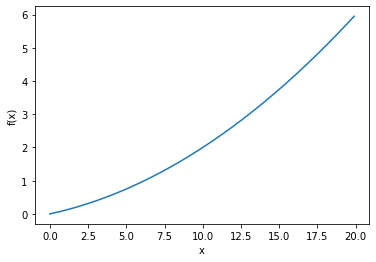

In [59]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x, y)
plt.show()

In [60]:
numerical_diff(function_1, 5)

0.1999999999990898

In [61]:
numerical_diff(function_1, 10)

0.2999999999986347

### 偏微分

$$ f(x_{0},x_{1})=x_0^2+x_1^2 $$

In [62]:
def function_2(x):
  return x[0]**2 + x[1]**2
  # または return np.sum(x**2)

### 勾配

In [67]:
def numerical_gradient(f, x: np.array) -> np.array:
  h = 1e-4
  grad = np.zeros_like(x)

  for idx in range(x.size):
    tmp_val = x[idx]

    # f(x+h)の計算
    x[idx] = tmp_val + h
    fxh1 = f(x)

    # f(x-h)の計算
    x[idx] = tmp_val - h
    fxh2 = f(x)

    grad[idx] = (fxh1 - fxh2) / (2*h)
    x[idx] = tmp_val

  return grad

In [68]:
numerical_gradient(function_2, np.array([3.0, 4.0]))

array([6., 8.])

In [69]:
numerical_gradient(function_2, np.array([0.0, 2.0]))

array([0., 4.])

In [70]:
numerical_gradient(function_2, np.array([3.0, 0.0]))

array([6., 0.])

購買が示す方向は、各場所において**関数の値を最も減らす方向**

勾配降下法

In [72]:
def gradient_descent(f, init_x, lr=0.01, step_num=100):
  x = init_x

  for i in range(step_num):
    grad = numerical_gradient(f, x)
    x -= lr * grad

  return x

関数の極小値を求めることができる

うまくいけば最小値を求めることができる

In [73]:
init_x = np.array([-3.0, 4.0])

gradient_descent(function_2, init_x=init_x, lr=0.1, step_num=100)

array([-6.11110793e-10,  8.14814391e-10])